In [1]:
import json
import cv2

import matplotlib.pyplot as plt

import numpy as np

In [2]:
with open('config.json') as f_in:
    config = json.load(f_in)

# Deal with contrasts 

### Histogram Equalization

In [3]:
# Load your low-contrast image
image = cv2.imread('vignettes/rgb/rgb_305_6795/rgb_35_306000_6795000.jpg')
mask = cv2.imread('vignettes/mask/mask_305_6795/mask_35_306000_6795000.png')
image_to_equalize = cv2.imread('vignettes/rgb/rgb_305_6795/rgb_35_306000_6795000.jpg', cv2.IMREAD_GRAYSCALE)

# histogram equalization
equalized_image = cv2.equalizeHist(image_to_equalize)

# Adaptive histogram equalization is supposed to be more robust
# CLAHE = Contrast Limited Adaptive Histogram Equalization
# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# Apply CLAHE to the image
adap_equalized_image = clahe.apply(image_to_equalize)

# Adjusting the gamma of an image can be used to enhance or reduce contrast
# Apply gamma correction
gamma = 0.5  # You can adjust this value
gamma_equalized = np.uint8(cv2.pow(image_to_equalize / 255.0, gamma) * 255)

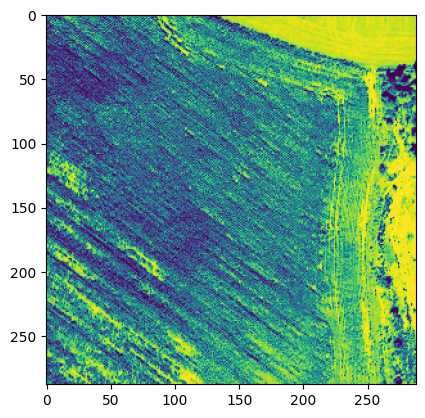

In [4]:
plt.imshow(equalized_image)

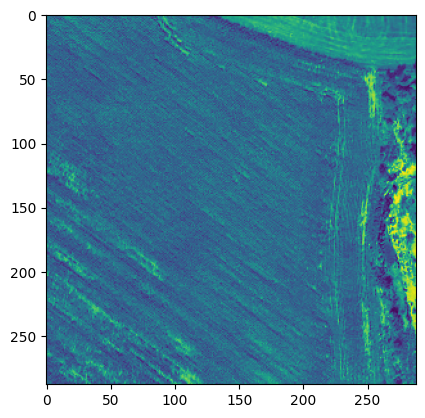

In [5]:
plt.imshow(adap_equalized_image)

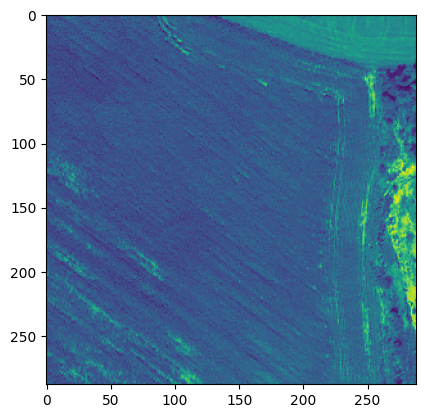

In [6]:
plt.imshow(gamma_equalized)

## Local Contrast Enhancement

Some regions in an image may have different contrast requirements. You can apply contrast enhancement techniques locally to specific regions of interest. One common approach is to use the Unsharp Masking technique.\
The name of the Unsharp Masking technique derives from the fact that the technique uses a blurred, or "unsharp", negative image to create a mask of the original image. The unsharp mask is then combined with the original positive image, creating an image that is less blurry than the original. The resulting image, although clearer, may be a less accurate representation of the image's subject.



In [8]:
# Apply unsharp masking for local contrast enhancement
blurred = cv2.GaussianBlur(image_to_equalize, (0, 0), 1)
sharp = cv2.addWeighted(image_to_equalize, 2.5, blurred, -1.5, 0)


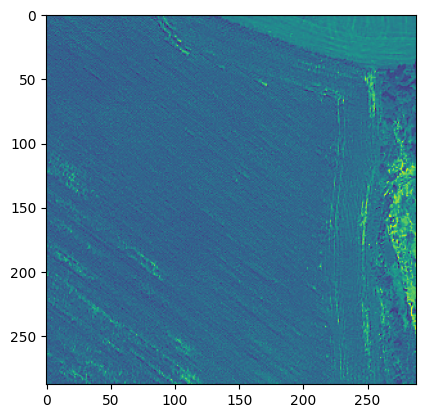

In [9]:
plt.imshow(sharp)

## Filter : Laplacian & Sobel

The Sobel and Laplacian filters both work with convolutions and achieve the same end goal : edge detection.



The Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes. The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical.
The matrices below are the Sobel Kernels in x-dir and y-dir:rix}atrix}ix}

\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1 
\end{bmatrix}

In [12]:
# Convert the image to grayscale (Sobel filter is typically applied to grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Sobel filter in the x and y directions
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Convert the filtered images back to uint8 format and combine them to visualize
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)
sobel_combined = cv2.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)


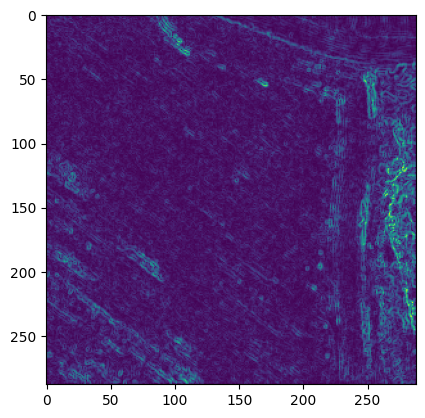

In [13]:
plt.imshow(sobel_combined)

In [14]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel filters in the x and y directions
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of the gradient
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert the gradient magnitude to uint8
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

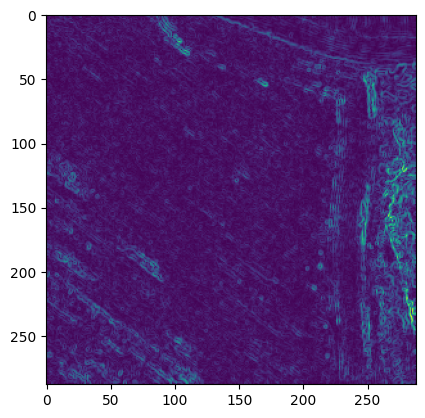

In [15]:
plt.imshow(gradient_magnitude)

Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass.
A kernel used in this Laplacian detection looks like this:
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 
\end{bmatrix}


In [10]:
# Load the image
image_path = 'vignettes/rgb/rgb_305_6795/rgb_35_306000_6795000.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale (Laplacian filter is typically applied to grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Laplacian filter
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Convert the filtered image back to uint8 and scale it for visualization
laplacian_abs = np.uint8(np.absolute(laplacian))

# Add the Laplacian filtered image to the original image to highlight edges
enhanced_image = cv2.addWeighted(image, 1.5, cv2.cvtColor(laplacian_abs, cv2.COLOR_GRAY2BGR), -0.5, 0)


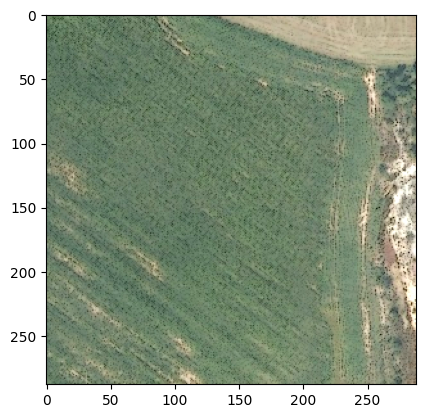

In [11]:
plt.imshow(enhanced_image)

# Original image

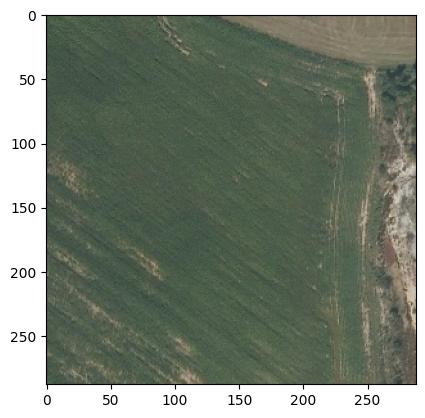

In [7]:
plt.imshow(image)